# # S&P500 Minimum Variance Portfolio and Stock Analyzer

Welcome to the Minimum Variance Portfolio and Stock Analysis Tool! This program is designed for retail investors seeking an edge in their personal investment strategies. 

# Sections
1. Setup
2. Minimum Variance Portfolio
3. Individual Stock Distribution Analysis
4. Correlation Matrix and K-Means Clustering Analysis

> **Although you don't need to run each section in order, it is essential to run the Setup section with any fresh kernel.If the kernel dies while querying data (which occasionally happens due to the high volume of data being pulled), simply restart the kernel, run the setup section, and return to the beginning of the section you were on.**

Each section has well-documented code, its own explanation of the graphs you will see, and variables you may need to change to suit your own purposes. And without further ado... happy exploring!

# Section 1: Setup (You must run this section before you do any other section)

In this section, you will create a DataFrame containing information on S&P 500 companies. Make sure to run this section before proceeding to any other sections, as it generates the list of S&P 500 companies and the DataFrame required for the rest of the program.
Please take note of the following:
1. If the program indicates that some stocks failed to download, don't worry. It just means that Wikipedia has listed a stock that yfinance doesn't have data for. Avoid analyzing these stocks in the subsequent sections of the program.
2. If the kernel breaks while running the second cell, simply retry starting from the top of this section.

In [1]:
import pandas as pd
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import numpy as np
import cvxpy as cp
from sklearn.cluster import KMeans
import  pylab as pl
import seaborn

def get_sp500_tickers():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    sp500_wikipedia = pd.read_html(url)
    ticker_df = sp500_wikipedia[0]  # The first table on the page contains the tickers
    tickers = ticker_df["Symbol"].tolist()
    tickers_string = " ".join(tickers)
    
    return tickers_string


sp500_tickers = get_sp500_tickers()
print("S&P 500 tickers:")
print(sp500_tickers)

S&P 500 tickers:
MMM AOS ABT ABBV ACN ATVI ADM ADBE ADP AAP AES AFL A APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AMD AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS AON APA AAPL AMAT APTV ACGL ANET AJG AIZ T ATO ADSK AZO AVB AVY BKR BALL BAC BBWI BAX BDX WRB BRK.B BBY BIO TECH BIIB BLK BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF.B BG CHRW CDNS CZR CPT CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CDAY CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CEG COO CPRT GLW CTVA CSGP COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DISH DIS DG DLTR D DPZ DOV DOW DTE DUK DD DXC EMN ETN EBAY ECL EIX EW EA ELV LLY EMR ENPH ETR EOG EPAM EQT EFX EQIX EQR ESS EL ETSY RE EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FICO FAST FRT FDX FITB FRC FSLR FE FIS FISV FLT FMC F FTNT FTV FOXA FOX BEN FCX GRMN IT GEHC GEN GNRC GD GE GIS GM GPC GILD GL GPN GS HAL HIG HAS HCA PEAK HSIC HSY HES HPE H

In [2]:
enddate = datetime.date.today()
startdate = enddate.replace(year=enddate.year - 1)

df = yf.download(sp500_tickers, start=startdate, end=enddate, group_by="ticker")

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [3]:
df.head()

HWM                                               
                          Open       High        Low      Close  Adj Close   
Date                                                                         
2022-04-21 00:00:00  37.200001  37.529999  35.529999  35.669998  35.556145  \
2022-04-22 00:00:00  35.500000  35.770000  34.869999  34.959999  34.848415   
2022-04-25 00:00:00  34.689999  34.849998  33.759998  34.820000  34.708858   
2022-04-26 00:00:00  34.630001  34.959999  34.250000  34.259998  34.150650   
2022-04-27 00:00:00  34.220001  34.570000  33.369999  34.400002  34.290203   

                                     AIZ                                       
                      Volume        Open        High         Low       Close   
Date                                                                           
2022-04-21 00:00:00  2232600  194.000000  194.119995  189.990005  190.330002  \
2022-04-22 00:00:00  1802800  189.460007  190.520004  186.440002  186.570007   
2022-04-25 00:00:00  3184800  185.250000  187.639999  182.440002  187.160004   
2022-04-26 00:00:00  3203700  186.020004  187.770004  184.550003  184.889999   
2022-04-27 00:00:00  3115700  184.839996  188.210007  184.000000  186.020004   

                     ...       NDAQ                                        GM   
                     ...        Low      Close  Adj Close   Volume       Open   
Date                 ...                                                        
2022-04-21 00:00:00  ...  56.233334  56.480000  55.699165  3123300  42.759998  \
2022-04-22 00:00:00  ...  55.586666  55.616669  54.847771  2491200  40.459999   
2022-04-25 00:00:00  ...  54.900002  55.546665  54.778732  3533400  39.349998   
2022-04-26 00:00:00  ...  53.866669  53.889999  53.144974  2699700  39.220001   
2022-04-27 00:00:00  ...  53.283333  53.349998  52.612438  6241500  38.290001   

                                                                           
                          High        Low      Close  Adj Close    Volume  
Date                                                                       
2022-04-21 00:00:00  43.000000  40.560001  40.709999  40.432938  12544000  
2022-04-22 00:00:00  40.740002  39.779999  39.840000  39.568859  17718400  
2022-04-25 00:00:00  39.990002  38.669998  39.820000  39.548996  18704400  
2022-04-26 00:00:00  39.450001  37.889999  38.040001  37.781109  21679500  
2022-04-27 00:00:00  39.520000  37.700001  38.660000  38.396889  19827700  

[5 rows x 3018 columns]

# Section 2: Minimum Variance Portfolio

This section uses daily data from the last 2 years to determine a minimum variance portfolio based on the stocks on the S&P500. 
Few things to note:
1. Don't worry if the program says that a few stocks failed to download. That simply means Wikipedia has a stock listed that yfinance doesn't have the data for. It should be negligible for the minimum variance portfolio.
2. If the second cell breaks the kernel, simply try again from the top of the setup section.
3. The final cell in this section gives a table based on the weights of the stocks in the minimum variance portfolio. There may be some stocks with negative weights. All the stocks with negative weights can be assumed to be 0 (due to them being negligibly small and the fact that no negative weights can be included in the portfolio). We can attribute this to rounding error of the model. The remaining stocks are positive and sum to 100%, as desired.

In [4]:
# Ways to customize this section:

# Currently, the code is set to build an ETF on the entire S&P500. If you don't want to do this, uncomment the following line and edit sp500_tickers you wish to build your portfolio on.
sp500_tickers = 'AAPL AMZN GOOG INTC ORCL XOM CVX COP HES OXY'

# Currently, the final cell in this section gives a table based on the weights of the stocks in the minimum variance portfolio. If you would like to specify how much money you wish to invest, uncomment and edit the following line.
investment = 1000

In [5]:
# extract daily returns for past 2 years

enddate = datetime.date.today()
startdate = enddate.replace(year=enddate.year - 2)

#replace the sp500_tickers variable
df_moly = yf.download(sp500_tickers, start=startdate, end=enddate, interval='1d', group_by='ticker')
df_moly.tail()

[*********************100%***********************]  10 of 10 completed


AMZN                                                   
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-04-14  102.070000  103.199997  101.110001  102.510002  102.510002  \
2023-04-17  103.160004  103.730003  101.589996  102.739998  102.739998   
2023-04-18  103.949997  104.199997  101.519997  102.300003  102.300003   
2023-04-19  101.580002  105.120003  101.389999  104.300003  104.300003   
2023-04-20  103.529999  105.250000  103.209999  103.809998  103.809998   

                            GOOG                                      ...   
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2023-04-14  51388300  107.690002  109.580002  107.589996  109.459999  ...  \
2023-04-17  39919500  105.430000  106.709999  105.320000  106.419998  ...   
2023-04-18  39790500  107.000000  107.050003  104.779999  105.120003  ...   
2023-04-19  58398900  104.214996  105.724998  103.800003  105.019997  ...   
2023-04-20  57622000  104.650002  106.888000  104.639999  105.900002  ...   

                   HES                                          CVX   
                   Low       Close   Adj Close   Volume        Open   
Date                                                                  
2023-04-14  147.309998  148.929993  148.929993  1551400  172.500000  \
2023-04-17  145.119995  145.649994  145.649994  1159400  172.389999   
2023-04-18  144.350006  145.800003  145.800003   863000  170.820007   
2023-04-19  141.970001  144.940002  144.940002  1681000  169.460007   
2023-04-20  142.059998  143.990005  143.990005  1121200  168.759995   

                                                                     
                  High         Low       Close   Adj Close   Volume  
Date                                                                 
2023-04-14  172.880005  171.220001  172.440002  172.440002  4930100  
2023-04-17  172.539993  170.220001  170.919998  170.919998  7006000  
2023-04-18  172.389999  170.130005  170.520004  170.520004  8045600  
2023-04-19  170.740005  169.100006  170.679993  170.679993  5506800  
2023-04-20  170.059998  168.020004  169.850006  169.850006  5850400  

[5 rows x 60 columns]

In [6]:
# stack the dataframe returned by yfinance
df_adjclose_moly = df_moly.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
df_pivot_moly = df_adjclose_moly.pivot_table(index='Date',columns='Ticker',values='Adj Close')
df_pivot_moly.tail()

Ticker,AAPL,AMZN,COP,CVX,GOOG,HES,INTC,ORCL,OXY,XOM
Date,,,,,,,,,,
2023-04-14,165.210007,102.510002,108.500000,172.440002,109.459999,148.929993,31.889999,95.709999,64.480003,116.050003
2023-04-17,165.229996,102.739998,105.610001,170.919998,106.419998,145.649994,32.139999,95.589996,62.939999,114.699997
2023-04-18,166.470001,102.300003,104.949997,170.520004,105.120003,145.800003,31.830000,96.470001,63.000000,116.940002
2023-04-19,167.630005,104.300003,105.260002,170.679993,105.019997,144.940002,31.150000,95.809998,62.470001,116.570000
2023-04-20,166.649994,103.809998,103.779999,169.850006,105.900002,143.990005,30.860001,94.830002,62.029999,115.639999


In [7]:
# generate log monthly returns
import numpy as np
log_returns_moly = np.log(df_pivot_moly / df_pivot_moly.shift(1))
log_returns_moly = log_returns_moly.dropna()
log_returns_moly.tail()

Ticker,AAPL,AMZN,COP,CVX,GOOG,HES,INTC,ORCL,OXY,XOM
Date,,,,,,,,,,
2023-04-14,-0.002116,0.001074,-0.004965,0.002032,0.011670,0.011345,-0.007498,0.001673,-0.004487,0.002416
2023-04-17,0.000121,0.002241,-0.026997,-0.008854,-0.028166,-0.022270,0.007809,-0.001255,-0.024173,-0.011701
2023-04-18,0.007477,-0.004292,-0.006269,-0.002343,-0.012291,0.001029,-0.009692,0.009164,0.000953,0.019341
2023-04-19,0.006944,0.019362,0.002949,0.000938,-0.000952,-0.005916,-0.021595,-0.006865,-0.008448,-0.003169
2023-04-20,-0.005863,-0.004709,-0.014160,-0.004875,0.008344,-0.006576,-0.009353,-0.010281,-0.007068,-0.008010


In [8]:
# covariance matrix
Q = log_returns_moly.cov().to_numpy()
Q

array([[3.52332438e-04, 3.14589933e-04, 1.03155758e-04, 9.31567586e-05,
        2.85871050e-04, 1.24658804e-04, 2.39985264e-04, 1.74513626e-04,
        1.34499731e-04, 9.00335528e-05],
       [3.14589933e-04, 6.60149830e-04, 1.16270002e-04, 1.05276096e-04,
        3.76911252e-04, 1.48088988e-04, 2.57798754e-04, 1.85178153e-04,
        1.57964397e-04, 9.18927206e-05],
       [1.03155758e-04, 1.16270002e-04, 5.97049103e-04, 3.78609404e-04,
        9.71274412e-05, 5.73384501e-04, 1.31175499e-04, 9.76115983e-05,
        6.03532658e-04, 4.23843745e-04],
       [9.31567586e-05, 1.05276096e-04, 3.78609404e-04, 3.27035731e-04,
        9.37870656e-05, 3.85620660e-04, 1.07827203e-04, 8.39072030e-05,
        4.17093747e-04, 3.19048769e-04],
       [2.85871050e-04, 3.76911252e-04, 9.71274412e-05, 9.37870656e-05,
        4.40984010e-04, 1.17253158e-04, 2.62094396e-04, 1.67296371e-04,
        1.36092383e-04, 7.75412949e-05],
       [1.24658804e-04, 1.48088988e-04, 5.73384501e-04, 3.85620660e-04,
   

In [9]:
X = cp.Variable(Q.shape[0])

# Defining risk objective
risk = cp.quad_form(X,Q)
objective = cp.Minimize(risk)


# Budget and weights constraints
constraints = [cp.sum(X) == 1, 
                X >= 0]
# Solver 
prob = cp.Problem(objective, constraints)
prob.solve()

0.00018290406137460002

In [10]:
# get the weights of the stocks in the minimum variance portfolio
Ticker = pd.DataFrame(log_returns_moly.columns)
weight = pd.DataFrame(X.value)
port_wgt = pd.concat([Ticker, weight], axis=1)

# calculate the amount to allocate to each stock
total_weight = port_wgt[0].sum()
allocations = investment * port_wgt[0] / total_weight

# combine the allocations with the ticker symbols
allocations = pd.concat([Ticker, allocations], axis=1)

# set the header of the allocations DataFrame
allocations.columns = ['Ticker', 'Allocation']

# print the allocations
print(allocations)

  Ticker    Allocation
0   AAPL  1.549714e+02
1   AMZN -3.513480e-16
2    COP  1.607536e-15
3    CVX  3.148386e+02
4   GOOG  7.532924e+01
5    HES  6.107012e-15
6   INTC  7.213822e+01
7   ORCL  3.038449e+02
8    OXY  8.304787e-15
9    XOM  7.887764e+01


And voila! Your minimum variance portfolio! 

As mentioned earlier, any the stocks with negative weights are negligible and can be assumed to be 0. We can attribute this to rounding error of the model.

# Section 3: Normal Distribution Stock Analysis

This section conducts analysis on a stock and determines if it is normally distributed or not. Please edit the following cell with your desired stock ticker. By default, I've set it to everyone's favourite: Apple (AAPL).

In [11]:
# Edit the following line by entering your desired ticker.

stock = 'AAPL'

In [12]:
stock_ret = (df[stock]["Adj Close"] - df[stock]['Adj Close'].shift(1)) / df[stock]['Adj Close'].shift(1) *100
stock_ret

Date
2022-04-21         NaN
2022-04-22   -2.782121
2022-04-25    0.673721
2022-04-26   -3.732803
2022-04-27   -0.146688
                ...   
2023-04-14   -0.211398
2023-04-17    0.012099
2023-04-18    0.750472
2023-04-19    0.696824
2023-04-20   -0.584627
Name: Adj Close, Length: 251, dtype: float64

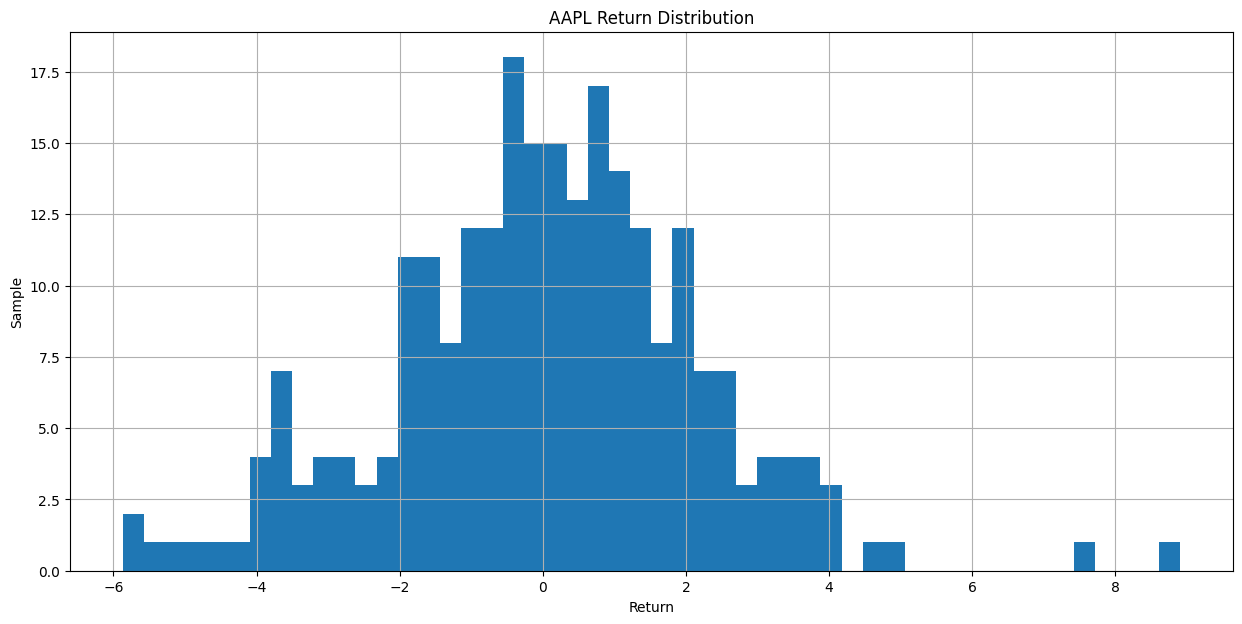

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
stock_ret.hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title(stock + ' Return Distribution')
plt.show()

Above is the return distribution of your desired stock. Note that it may (or may not) look like a bell curve, but the next cell will show you that this may not be true!

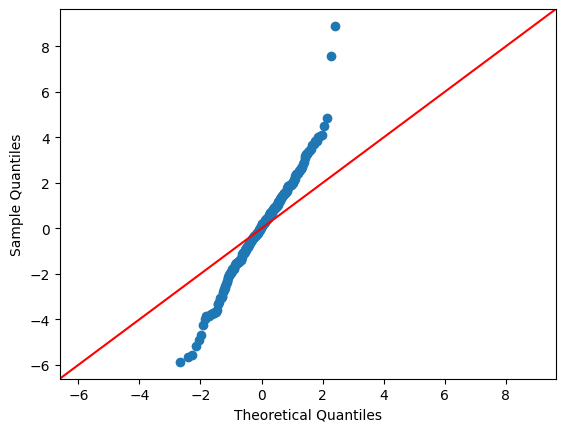

In [14]:
import statsmodels.api as sm

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(stock_ret, line='45')
plt.show()

In the graph above, if the dotted line aligns with the red line, the return graph of your stock is normally distributed! If there is deviance from the red line, the distribution has a fat tail and the return graph of your stock is not normally distributed!

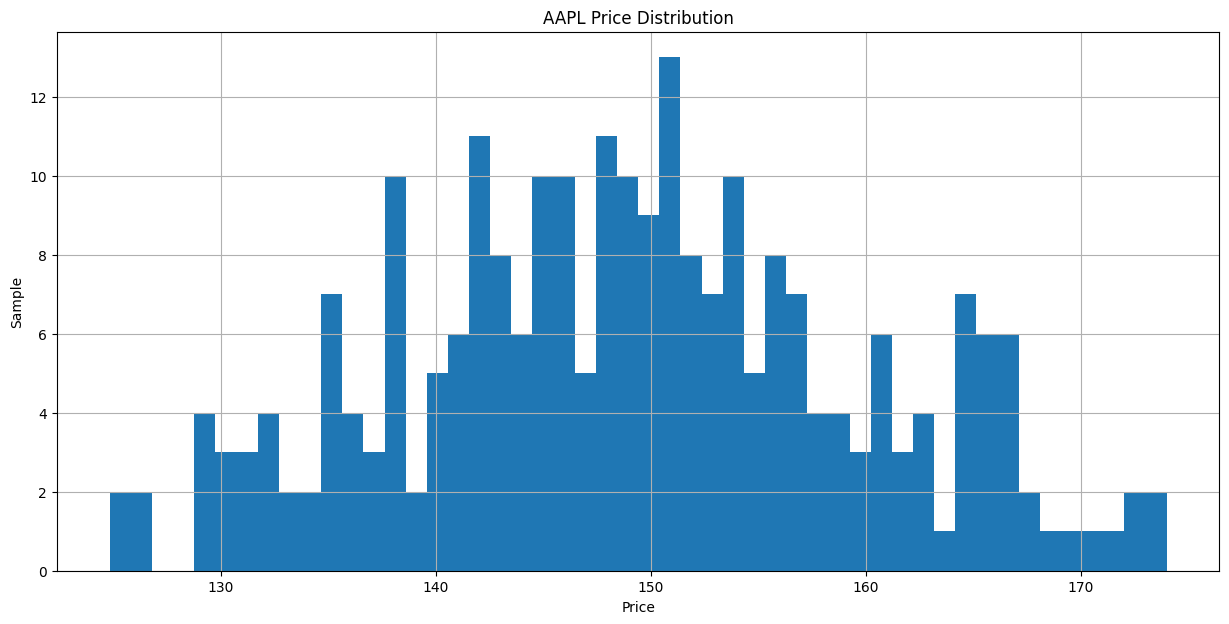

In [15]:
stock_price = df[stock]["Adj Close"]

fig = plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,1,1)
stock_price.hist(bins=50, ax=ax1)
ax1.set_xlabel('Price')
ax1.set_ylabel('Sample')
ax1.set_title(stock + ' Price Distribution')
plt.show()

Above is the price distribution of your desired stock. Note that it may (or may not) look like a bell curve, but the next cell will show you that this may not be true!

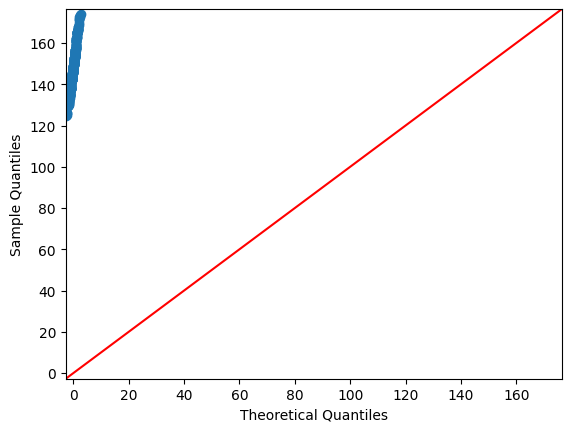

In [16]:
fig = sm.qqplot(stock_price, line='45')
plt.show()

In the graph above, if the dotted line aligns with the red line, the price graph of your stock is normally distributed! If there is deviance from the red line, the price has a fat tail and the return graph of your stock is not normally distributed!

# Section 4: Correlation Matrix and K-Means Clustering Analysis

This section computes a correlation matrix and k-means clustering analysis of daily returns for a given array of stocks. Please edit the following cell with your desired list of stocks (Or try it with the default list of tickers)

Something to note: Please be advised that if you try to analyze too many stocks here, the charts will not be able to render

In [17]:
# Edit the following line by entering the desired tickers in the same format.

sp500_tickers = 'AAPL AMZN GOOG INTC ORCL XOM CVX COP HES OXY'

In [18]:
selected_tickers = sp500_tickers.split()

# stack the dataframe returned by yfinance
df_adjclose = df.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

# Filter the DataFrame to include only the selected tickers
df_adjclose_filtered = df_adjclose[df_adjclose['Ticker'].isin(selected_tickers)]

df_adjclose_filtered.tail()

,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-04-20,HES,143.990005,143.990005,144.160004,142.059998,143.259995,1121200.0
2023-04-20,INTC,30.860001,30.860001,31.250000,30.709999,30.760000,30249800.0
2023-04-20,ORCL,94.830002,94.830002,96.150002,94.599998,96.000000,5815500.0
2023-04-20,OXY,62.029999,62.029999,62.270000,61.500000,61.549999,7760300.0
2023-04-20,XOM,115.639999,115.639999,115.680000,113.230003,115.129997,17035300.0


In [19]:
# create a pivot table by just retaining the "Adj Close" column - used for calculating returns in subsequent step
df_pivot = df_adjclose_filtered.pivot_table(index='Date',columns='Ticker',values='Adj Close')
df_pivot.tail()

Ticker,AAPL,AMZN,COP,CVX,GOOG,HES,INTC,ORCL,OXY,XOM
Date,,,,,,,,,,
2023-04-14,165.210007,102.510002,108.500000,172.440002,109.459999,148.929993,31.889999,95.709999,64.480003,116.050003
2023-04-17,165.229996,102.739998,105.610001,170.919998,106.419998,145.649994,32.139999,95.589996,62.939999,114.699997
2023-04-18,166.470001,102.300003,104.949997,170.520004,105.120003,145.800003,31.830000,96.470001,63.000000,116.940002
2023-04-19,167.630005,104.300003,105.260002,170.679993,105.019997,144.940002,31.150000,95.809998,62.470001,116.570000
2023-04-20,166.649994,103.809998,103.779999,169.850006,105.900002,143.990005,30.860001,94.830002,62.029999,115.639999


In [20]:
# generate log daily returns
log_returns = np.log(df_pivot / df_pivot.shift(1))
log_returns

Ticker,AAPL,AMZN,COP,CVX,GOOG,HES,INTC,ORCL,OXY,XOM
Date,,,,,,,,,,
2022-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-22,-0.028216,-0.026969,-0.027329,-0.022303,-0.043544,-0.034349,-0.020418,-0.042013,-0.044559,-0.022074
2022-04-25,0.006715,0.011872,-0.046366,-0.021732,0.029945,-0.036642,0.011111,0.010053,-0.030485,-0.034294
2022-04-26,-0.038043,-0.046830,-0.003716,-0.006114,-0.030848,-0.011171,-0.033272,-0.032612,-0.001822,0.000365
2022-04-27,-0.001468,-0.008820,0.018875,-0.001854,-0.038256,0.012437,-0.006612,0.003350,0.013948,0.028157
...,...,...,...,...,...,...,...,...,...,...
2023-04-14,-0.002116,0.001074,-0.004965,0.002032,0.011670,0.011345,-0.007498,0.001673,-0.004487,0.002416
2023-04-17,0.000121,0.002241,-0.026997,-0.008854,-0.028166,-0.022270,0.007809,-0.001255,-0.024173,-0.011701
2023-04-18,0.007477,-0.004292,-0.006269,-0.002343,-0.012291,0.001029,-0.009692,0.009164,0.000953,0.019341


In [21]:
# daily returns correlation matrix
corr_df = log_returns.corr()
corr_df

Ticker,AAPL,AMZN,COP,CVX,GOOG,HES,INTC,ORCL,OXY,XOM
Ticker,,,,,,,,,,
AAPL,1.000000,0.701557,0.289187,0.409807,0.753897,0.300181,0.680114,0.595717,0.352313,0.373815
AMZN,0.701557,1.000000,0.223936,0.330528,0.737064,0.232491,0.515579,0.518541,0.313074,0.252026
COP,0.289187,0.223936,1.000000,0.880949,0.208713,0.907226,0.280777,0.266280,0.789715,0.896156
CVX,0.409807,0.330528,0.880949,1.000000,0.319369,0.859453,0.329397,0.372490,0.794853,0.905749
GOOG,0.753897,0.737064,0.208713,0.319369,1.000000,0.213130,0.629966,0.491510,0.286214,0.261259
HES,0.300181,0.232491,0.907226,0.859453,0.213130,1.000000,0.297719,0.293004,0.801939,0.875519
INTC,0.680114,0.515579,0.280777,0.329397,0.629966,0.297719,1.000000,0.522850,0.354202,0.310654
ORCL,0.595717,0.518541,0.266280,0.372490,0.491510,0.293004,0.522850,1.000000,0.339352,0.341331
OXY,0.352313,0.313074,0.789715,0.794853,0.286214,0.801939,0.354202,0.339352,1.000000,0.795993


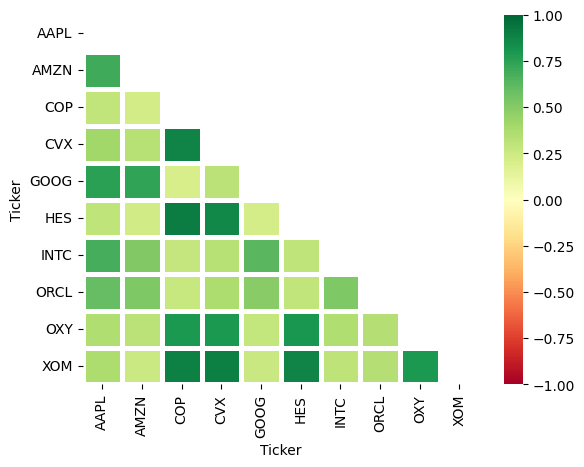

In [22]:
import seaborn

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

This heat map shows the correlation between the selected stocks. The darker the square is, the more correlated the 2
corresponding stocks are. Notice that stocks in the same industry tend to be positively correlated. In the default list of stocks (AAPL AMZN GOOG INTC ORCL XOM CVX COP HES OXY), you can probably see that the tech stocks (AAPL AMZN GOOG INTC ORCL) are positively correlated with one another and the energy stocks (XOM CVX COP HES OXY) are positively correlated with one another.

In [23]:
# generate log daily returns for k-means clustering

log_returns = log_returns.dropna()
log_returns

Ticker,AAPL,AMZN,COP,CVX,GOOG,HES,INTC,ORCL,OXY,XOM
Date,,,,,,,,,,
2022-04-22,-0.028216,-0.026969,-0.027329,-0.022303,-0.043544,-0.034349,-0.020418,-0.042013,-0.044559,-0.022074
2022-04-25,0.006715,0.011872,-0.046366,-0.021732,0.029945,-0.036642,0.011111,0.010053,-0.030485,-0.034294
2022-04-26,-0.038043,-0.046830,-0.003716,-0.006114,-0.030848,-0.011171,-0.033272,-0.032612,-0.001822,0.000365
2022-04-27,-0.001468,-0.008820,0.018875,-0.001854,-0.038256,0.012437,-0.006612,0.003350,0.013948,0.028157
2022-04-28,0.044166,0.045484,0.047121,0.034906,0.037465,0.023089,0.035198,0.018291,0.025574,0.029797
...,...,...,...,...,...,...,...,...,...,...
2023-04-14,-0.002116,0.001074,-0.004965,0.002032,0.011670,0.011345,-0.007498,0.001673,-0.004487,0.002416
2023-04-17,0.000121,0.002241,-0.026997,-0.008854,-0.028166,-0.022270,0.007809,-0.001255,-0.024173,-0.011701
2023-04-18,0.007477,-0.004292,-0.006269,-0.002343,-0.012291,0.001029,-0.009692,0.009164,0.000953,0.019341


In [24]:
log_returns_transpose = log_returns.T
log_returns_transpose

Date,2022-04-22,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-05-02,2022-05-03,2022-05-04,2022-05-05,...,2023-04-06,2023-04-10,2023-04-11,2023-04-12,2023-04-13,2023-04-14,2023-04-17,2023-04-18,2023-04-19,2023-04-20
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,-0.028216,0.006715,-0.038043,-0.001468,0.044166,-0.037292,0.001965,0.009577,0.040190,-0.057328,...,0.005481,-0.016101,-0.007620,-0.004363,0.033535,-0.002116,0.000121,0.007477,0.006944,-0.005863
AMZN,-0.026969,0.011872,-0.046830,-0.008820,0.045484,-0.151398,0.001757,-0.001982,0.013390,-0.078622,...,0.009451,0.001077,-0.022268,-0.021139,0.045655,0.001074,0.002241,-0.004292,0.019362,-0.004709
COP,-0.027329,-0.046366,-0.003716,0.018875,0.047121,-0.021029,0.004179,0.030898,0.048631,-0.009675,...,-0.013925,-0.002922,0.007522,0.007280,0.013945,-0.004965,-0.026997,-0.006269,0.002949,-0.014160
CVX,-0.022303,-0.021732,-0.006114,-0.001854,0.034906,-0.032157,0.019468,0.017007,0.030904,-0.007968,...,-0.013214,0.003810,0.005511,0.003539,0.013278,0.002032,-0.008854,-0.002343,0.000938,-0.004875
GOOG,-0.043544,0.029945,-0.030848,-0.038256,0.037465,-0.037935,0.018874,0.008267,0.036942,-0.048718,...,0.036946,-0.018069,-0.007791,-0.008517,0.027836,0.011670,-0.028166,-0.012291,-0.000952,0.008344
HES,-0.034349,-0.036642,-0.011171,0.012437,0.023089,-0.019980,-0.006717,0.042828,0.042415,-0.017371,...,-0.009396,0.010240,0.017205,0.009417,0.007362,0.011345,-0.022270,0.001029,-0.005916,-0.006576
INTC,-0.020418,0.011111,-0.033272,-0.006612,0.035198,-0.071910,0.030945,0.002222,0.032317,-0.034705,...,-0.000609,-0.008878,-0.005241,-0.010253,0.003429,-0.007498,0.007809,-0.009692,-0.021595,-0.009353
ORCL,-0.042013,0.010053,-0.032612,0.003350,0.018291,-0.036650,0.008141,-0.009641,0.025860,-0.032568,...,0.010796,-0.018597,0.002237,-0.000745,0.017419,0.001673,-0.001255,0.009164,-0.006865,-0.010281
OXY,-0.044559,-0.030485,-0.001822,0.013948,0.025574,-0.034609,0.056634,0.015995,0.038578,0.011626,...,-0.023980,0.016519,0.004359,0.007275,-0.001080,-0.004487,-0.024173,0.000953,-0.008448,-0.007068


In [25]:
#rename the columns

log_returns_transpose.rename(columns = {log_returns_transpose.columns[0]:'f1', log_returns_transpose.columns[1]:'f2', log_returns_transpose.columns[2]:'f3', log_returns_transpose.columns[3]:'f4', log_returns_transpose.columns[4]:'f5', log_returns_transpose.columns[5]:'f6', log_returns_transpose.columns[6]:'f7'}, inplace=True)
log_returns_transpose

Date,f1,f2,f3,f4,f5,f6,f7,2022-05-03 00:00:00,2022-05-04 00:00:00,2022-05-05 00:00:00,...,2023-04-06 00:00:00,2023-04-10 00:00:00,2023-04-11 00:00:00,2023-04-12 00:00:00,2023-04-13 00:00:00,2023-04-14 00:00:00,2023-04-17 00:00:00,2023-04-18 00:00:00,2023-04-19 00:00:00,2023-04-20 00:00:00
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,-0.028216,0.006715,-0.038043,-0.001468,0.044166,-0.037292,0.001965,0.009577,0.040190,-0.057328,...,0.005481,-0.016101,-0.007620,-0.004363,0.033535,-0.002116,0.000121,0.007477,0.006944,-0.005863
AMZN,-0.026969,0.011872,-0.046830,-0.008820,0.045484,-0.151398,0.001757,-0.001982,0.013390,-0.078622,...,0.009451,0.001077,-0.022268,-0.021139,0.045655,0.001074,0.002241,-0.004292,0.019362,-0.004709
COP,-0.027329,-0.046366,-0.003716,0.018875,0.047121,-0.021029,0.004179,0.030898,0.048631,-0.009675,...,-0.013925,-0.002922,0.007522,0.007280,0.013945,-0.004965,-0.026997,-0.006269,0.002949,-0.014160
CVX,-0.022303,-0.021732,-0.006114,-0.001854,0.034906,-0.032157,0.019468,0.017007,0.030904,-0.007968,...,-0.013214,0.003810,0.005511,0.003539,0.013278,0.002032,-0.008854,-0.002343,0.000938,-0.004875
GOOG,-0.043544,0.029945,-0.030848,-0.038256,0.037465,-0.037935,0.018874,0.008267,0.036942,-0.048718,...,0.036946,-0.018069,-0.007791,-0.008517,0.027836,0.011670,-0.028166,-0.012291,-0.000952,0.008344
HES,-0.034349,-0.036642,-0.011171,0.012437,0.023089,-0.019980,-0.006717,0.042828,0.042415,-0.017371,...,-0.009396,0.010240,0.017205,0.009417,0.007362,0.011345,-0.022270,0.001029,-0.005916,-0.006576
INTC,-0.020418,0.011111,-0.033272,-0.006612,0.035198,-0.071910,0.030945,0.002222,0.032317,-0.034705,...,-0.000609,-0.008878,-0.005241,-0.010253,0.003429,-0.007498,0.007809,-0.009692,-0.021595,-0.009353
ORCL,-0.042013,0.010053,-0.032612,0.003350,0.018291,-0.036650,0.008141,-0.009641,0.025860,-0.032568,...,0.010796,-0.018597,0.002237,-0.000745,0.017419,0.001673,-0.001255,0.009164,-0.006865,-0.010281
OXY,-0.044559,-0.030485,-0.001822,0.013948,0.025574,-0.034609,0.056634,0.015995,0.038578,0.011626,...,-0.023980,0.016519,0.004359,0.007275,-0.001080,-0.004487,-0.024173,0.000953,-0.008448,-0.007068


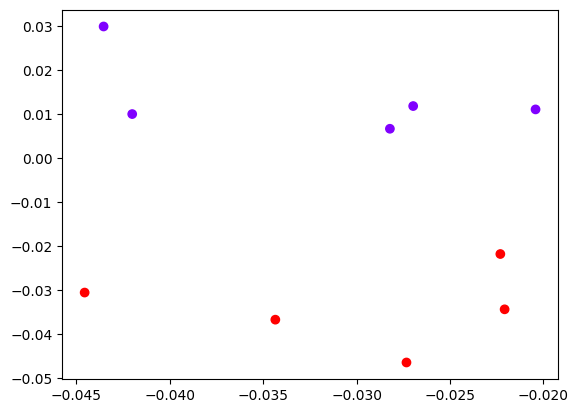

In [26]:
from sklearn.cluster import KMeans
import pandas as pd
import  pylab as pl

# converting into numpy array
X = log_returns_transpose.values 
# fit the K-Means with n_clusters = 2 and plot the results
kmeans = KMeans(n_clusters = 2).fit(X)
pl.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
pl.show()

The chart above shows a k-means clustering with 2 groups. Edit the code above if you would like more groups.

In [27]:
Ticker = pd.DataFrame(log_returns_transpose.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df_kmeans = pd.concat([Ticker, cluster_labels],axis = 1)
df_kmeans

,Ticker,0
0,AAPL,0
1,AMZN,0
2,COP,1
3,CVX,1
4,GOOG,0
5,HES,1
6,INTC,0
7,ORCL,0
8,OXY,1
9,XOM,1


The number corresponds with each group. In the default list of stocks (AAPL AMZN GOOG INTC ORCL XOM CVX COP HES OXY), you can probably see that the tech stocks (AAPL AMZN GOOG INTC ORCL) are in one group and the energy stocks (XOM CVX COP HES OXY) are in another.